# Imports

In [1]:
import numpy as np

from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error , mean_squared_error

import tensorflow as tf
from tensorflow.keras.layers import LSTM , Dropout , Dense
from tensorflow.keras.models import Sequential

import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../../data/Equity/NSE50.csv')
df['Date'] = pd.to_datetime(df['Date'])
df.index = df['Date']
df.drop(df[df['High']==df['Low']].index , axis=0 , inplace=True)
df.head()

,Ticker,Date,Time,Open,High,Low,Close,Volume,OI
Date,,,,,,,,,
1995-11-03,NSE50,1995-11-03,00:00:00,994.0,1001.0,993.0,1000.0,12938015,0
1995-11-06,NSE50,1995-11-06,00:00:00,1002.0,1002.0,989.0,989.0,9711115,0
1995-11-07,NSE50,1995-11-07,00:00:00,987.0,987.0,977.0,978.0,10985070,0
1995-11-08,NSE50,1995-11-08,00:00:00,976.0,976.0,963.0,964.0,7272730,0
1995-11-09,NSE50,1995-11-09,00:00:00,960.0,960.0,952.0,953.0,7680380,0


In [3]:
df.drop(['Ticker' , 'Date' ,'Time', 'Volume' , 'OI '] , axis=1 , inplace=True)
df = df.loc['2011-01':]
data = df.copy()

In [5]:
# Training and testing data
train_size = int(len(data) *0.80)
train = data[:train_size]
test = data[train_size :]

In [6]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_close = scaler.fit_transform(np.array(train['Close']).reshape(-1,1))

In [7]:
scaled_open = scaler.transform(np.array(train['Open']).reshape(-1,1))
scaled_high = scaler.transform(np.array(train['High']).reshape(-1,1))
scaled_low = scaler.transform(np.array(train['Low']).reshape(-1,1))

In [8]:
open_list = []
close_list = []
high_list = []
low_list = []
for i in range(len(scaled_open)):
    open_list.append(scaled_open[i])
    high_list.append(scaled_high[i])
    low_list.append(scaled_low[i])
    close_list.append( scaled_close[i])

In [9]:
open_arr = np.array(open_list).reshape(-1,1)
high_arr = np.array(high_list).reshape(-1,1)
low_arr = np.array(low_list).reshape(-1,1)
close_arr = np.array(close_list).reshape(-1,1)

In [10]:
scaled_data = pd.DataFrame(open_arr , columns=['Open'])

In [11]:
scaled_data['High'] = high_arr
scaled_data['Low'] = low_arr
scaled_data['Close'] = close_arr

In [12]:
scaled_train = np.array(scaled_data)

In [13]:
X_train = []
y_train = []

for x in range(60,len(scaled_train)-1):
    temp = []
    for i in scaled_train[x-60 :x,]:
        temp.append(i[0] )
        temp.append(i[1])
        temp.append( i[2])
        temp.append(i[3])
        
    X_train.append(temp)
    
    y_train.append(scaled_train[x+1][3])

In [14]:
X_train = np.array(X_train)
y_train = np.array(y_train)

In [15]:
X_train[1] , y_train[0]

(array([0.22636669, 0.22752035, 0.21964607, 0.22269713, 0.22200213,
        0.22200213, 0.21102122, 0.21344671, 0.21722751, 0.21849933,
        0.20545427, 0.20906132, 0.20664967, 0.20947139, 0.18617516,
        0.18909414, 0.1886354 , 0.18946247, 0.16634697, 0.16939104,
        0.17009994, 0.1804762 , 0.16040477, 0.1681748 , 0.17456176,
        0.18486858, 0.1622256 , 0.18334652, 0.18160903, 0.18258202,
        0.16575623, 0.16786897, 0.1678968 , 0.17923213, 0.15226634,
        0.15433741, 0.15353817, 0.16011978, 0.15011186, 0.15436524,
        0.15822938, 0.16489441, 0.15665872, 0.16399784, 0.16584656,
        0.16727822, 0.1554494 , 0.15941087, 0.15453899, 0.16474849,
        0.15155051, 0.16226734, 0.15954987, 0.16309434, 0.15711047,
        0.16016844, 0.16303184, 0.16843888, 0.16034219, 0.16666664,
        0.16945354, 0.17477025, 0.1579653 , 0.15890354, 0.16417158,
        0.16428283, 0.14605313, 0.14735271, 0.14870103, 0.14875662,
        0.12723262, 0.13454398, 0.12625963, 0.13

In [16]:
test_scaled_close = scaler.transform(np.array(test['Close']).reshape(-1,1))
test_scaled_open = scaler.transform(np.array(test['Open']).reshape(-1,1))
test_scaled_high = scaler.transform(np.array(test['High']).reshape(-1,1))
test_scaled_low = scaler.transform(np.array(test['Low']).reshape(-1,1))

In [17]:
open_list = []
close_list = []
high_list = []
low_list = []
for i in range(len(test_scaled_open)):
    open_list.append(test_scaled_open[i])
    high_list.append(test_scaled_high[i])
    low_list.append(test_scaled_low[i])
    close_list.append( test_scaled_close[i])

In [18]:
open_arr = np.array(open_list).reshape(-1,1)
high_arr = np.array(high_list).reshape(-1,1)
low_arr = np.array(low_list).reshape(-1,1)
close_arr = np.array(close_list).reshape(-1,1)

In [19]:
scaled_data = pd.DataFrame(open_arr , columns=['Open'])
scaled_data['High'] = high_arr
scaled_data['Low'] = low_arr
scaled_data['Close'] = close_arr

In [20]:
scaled_test = np.array(scaled_data)

In [21]:
X_test = []
y_test = []

for x in range(60,len(scaled_test)-1):
    temp = []
    for i in scaled_test[x-60 :x,]:
        temp.append(i[0] )
        temp.append(i[1])
        temp.append( i[2])
        temp.append(i[3])
        
    X_test.append(temp)
    
    y_test.append(scaled_test[x+1][3])

In [22]:
X_test = np.array(X_test)
y_test = np.array(y_test)

In [23]:
lstm = Sequential()
lstm.add(LSTM(250 ,return_sequences=True ,  input_shape=(240,1)))
lstm.add(LSTM(250 , return_sequences = True))
lstm.add(LSTM(250))
lstm.add(Dense(1))
lstm.compile(loss='mean_squared_error' , optimizer='adam' , metrics=['accuracy','mse'])

In [24]:
lstm.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 240, 250)          252000    
_________________________________________________________________
lstm_1 (LSTM)                (None, 240, 250)          501000    
_________________________________________________________________
lstm_2 (LSTM)                (None, 250)               501000    
_________________________________________________________________
dense (Dense)                (None, 1)                 251       
Total params: 1,254,251
Trainable params: 1,254,251
Non-trainable params: 0
_________________________________________________________________


In [25]:
X_train = X_train.reshape((-1,240 , 1))
y_train = y_train.reshape(-1,1)
X_test = X_test.reshape((-1,240,1))
y_train = y_train.reshape(-1,1)

In [26]:
lstm.fit(X_train ,y_train , validation_data=(X_test,y_test) ,epochs=100 , batch_size=64 ,verbose=1 )

Epoch 1/100
30/30 [==============================] - 73s 2s/step - loss: 0.0926 - accuracy: 4.0999e-04 - mse: 0.0926 - val_loss: 0.0361 - val_accuracy: 0.0000e+00 - val_mse: 0.0361
Epoch 2/100
30/30 [==============================] - 70s 2s/step - loss: 0.0017 - accuracy: 0.0012 - mse: 0.0017 - val_loss: 0.0044 - val_accuracy: 0.0000e+00 - val_mse: 0.0044
Epoch 3/100
30/30 [==============================] - 69s 2s/step - loss: 4.8149e-04 - accuracy: 6.8241e-04 - mse: 4.8149e-04 - val_loss: 0.0049 - val_accuracy: 0.0000e+00 - val_mse: 0.0049
Epoch 4/100
30/30 [==============================] - 70s 2s/step - loss: 3.7382e-04 - accuracy: 0.0016 - mse: 3.7382e-04 - val_loss: 0.0043 - val_accuracy: 0.0000e+00 - val_mse: 0.0043
Epoch 5/100
30/30 [==============================] - 70s 2s/step - loss: 3.8181e-04 - accuracy: 0.0012 - mse: 3.8181e-04 - val_loss: 0.0043 - val_accuracy: 0.0000e+00 - val_mse: 0.0043
Epoch 6/100
30/30 [==============================] - 68s 2s/step - loss: 3.3291e-04

KeyboardInterrupt: 

In [47]:
training_predictions = lstm.predict(X_train)

In [50]:
print('Mean Squared Error : {}'.format(mean_squared_error(scaler.inverse_transform(np.array(y_train).reshape(-1,1)) ,scaler.inverse_transform(training_predictions) )))
print('Mean Absolute Error : {}'.format(mean_absolute_error(scaler.inverse_transform(np.array(y_train).reshape(-1,1)) ,scaler.inverse_transform(training_predictions))))

Mean Squared Error : 6646.597456749025
Mean Absolute Error : 55.69503308193353


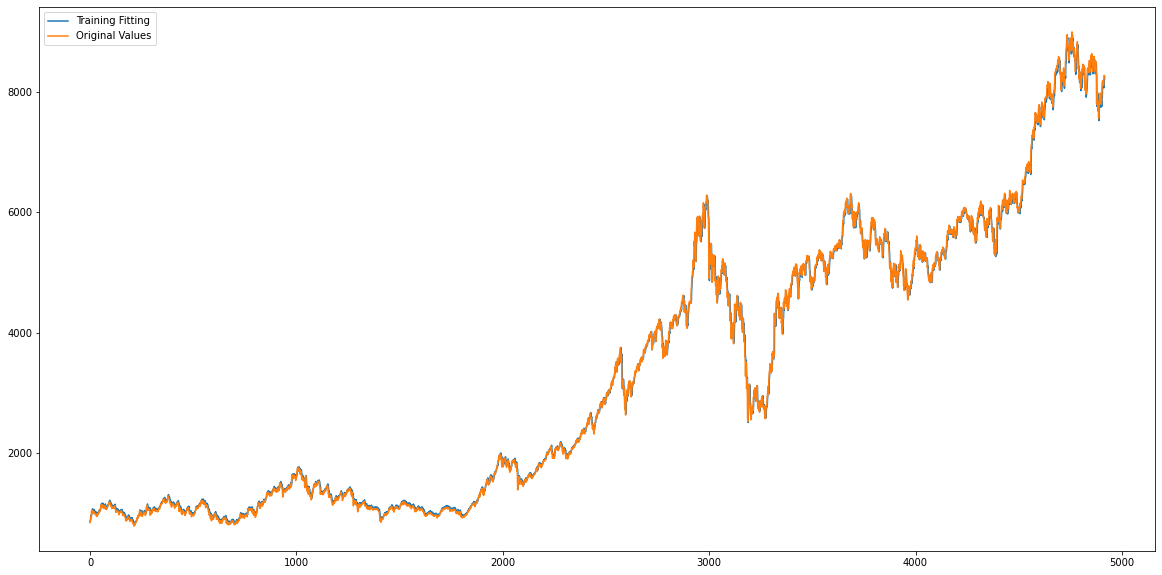

In [48]:
plt.figure(figsize=(20,10))
plt.plot(scaler.inverse_transform(training_predictions) , label='Training Fitting')
plt.plot(scaler.inverse_transform(np.array(y_train).reshape(-1,1)) ,label='Original Values')
plt.legend()
plt.show()

In [51]:
print('Mean Squared Error : {}'.format(mean_squared_error(scaler.inverse_transform(np.array(y_test).reshape(-1,1)) ,scaler.inverse_transform(preds) )))
print('Mean Absolute Error : {}'.format(mean_absolute_error(scaler.inverse_transform(np.array(y_test).reshape(-1,1)) ,scaler.inverse_transform(preds))))

Mean Squared Error : 60950.679821215825
Mean Absolute Error : 138.95093271088473


In [33]:
preds = lstm.predict(X_test)

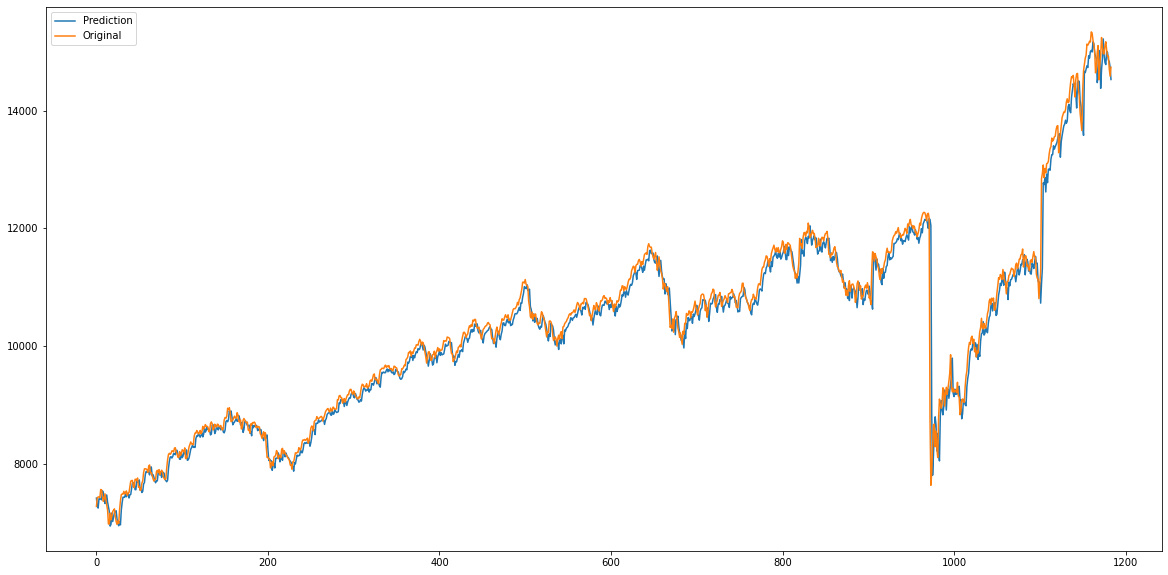

In [42]:
plt.figure(figsize=(20,10))
plt.plot(scaler.inverse_transform(preds) , label='Testing Prediction')
plt.plot(scaler.inverse_transform(np.array(y_test).reshape(-1,1)) ,label='Original')
plt.legend()
plt.show()

In [45]:
lstm.save_weights('./models/lstm240.weights')